In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)

## Importando datos

In [2]:
# 1.1 
# Verificar si no hay problemas en la importación
# Habilitar chequeos al importar
bp = pd.read_csv('../input/Building_Permits.csv', error_bad_lines=True, warn_bad_lines=True)

/Users/andres/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
bp[:5]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [4]:
bp.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


In [5]:
bp = pd.read_csv('../input/Building_Permits.csv', error_bad_lines=True, warn_bad_lines=True, parse_dates=[
    "Permit Creation Date", "Current Status Date", "Filed Date", "Issued Date", "Completed Date",
    "First Construction Document Date", "Permit Expiration Date"
])

/Users/andres/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
bp.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
count,198900.000000,198900.000000,29479.000000,156116.000000,156032.000000,1.608340e+05,1.928340e+05,147362.000000,147989.000000,161591.000000,155534.000000,155738.000000,197183.000000,197184.000000,1.989000e+05
mean,7.522323,1121.728944,78.517182,5.705773,5.745043,1.689554e+05,1.328562e+05,15.666164,16.510950,1.274650,4.072878,4.089529,5.538403,94115.500558,1.162048e+12
std,1.457451,1135.768948,326.981324,8.613455,8.613284,3.630386e+06,3.584903e+06,74.476321,75.220444,22.407345,1.585756,1.578766,2.887041,9.270131,4.918215e+11
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,94102.000000,1.293532e+10
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.300000e+03,1.000000e+00,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,94109.000000,1.308567e+12
50%,8.000000,710.000000,0.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,5.000000,5.000000,6.000000,94114.000000,1.371840e+12
75%,8.000000,1700.000000,1.000000,4.000000,4.000000,3.500000e+04,2.870750e+04,4.000000,4.000000,2.000000,5.000000,5.000000,8.000000,94122.000000,1.435000e+12
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,9000.000000,5.000000,5.000000,11.000000,94158.000000,1.498342e+12


In [7]:
bp.describe(include=['object'])

,Permit Number,Permit Type Definition,Block,Lot,Street Number Suffix,Street Name,Street Suffix,Unit Suffix,Description,Current Status,...,Voluntary Soft-Story Retrofit,Fire Only Permit,Existing Use,Proposed Use,TIDF Compliance,Existing Construction Type Description,Proposed Construction Type Description,Site Permit,Neighborhoods - Analysis Boundaries,Location
count,198900,198900,198900,198900,2216,198900,196132,1961,198610,198900,...,35,18827,157786,156461,2,155534,155738,5359,197175,197200
unique,181495,8,4896,1055,18,1704,21,164,134272,14,...,1,1,93,94,2,5,5,1,41,57604
top,201602179765,otc alterations permit,3708,001,A,Market,St,A,street space,complete,...,Y,Y,1 family dwelling,1 family dwelling,P,wood frame (5),wood frame (5),Y,Financial District/South Beach,"(37.79226164705184, -122.4034859571375)"
freq,101,178844,1195,10114,1501,5443,138358,346,22163,97077,...,35,18827,46766,46346,1,113350,114382,5359,21816,554


In [8]:
from slugify import slugify # pip install slugify

def sanitize_field_names(dataframe):
    dataf_out = pd.DataFrame()
    for column in dataframe.columns:
        dataf_out[slugify(column, separator='_')] = dataframe[column]
    return dataf_out

In [9]:
bp = sanitize_field_names(bp)

In [10]:
bp.columns

Index(['permit_number', 'permit_type', 'permit_type_definition',
       'permit_creation_date', 'block', 'lot', 'street_number',
       'street_number_suffix', 'street_name', 'street_suffix', 'unit',
       'unit_suffix', 'description', 'current_status', 'current_status_date',
       'filed_date', 'issued_date', 'completed_date',
       'first_construction_document_date', 'structural_notification',
       'number_of_existing_stories', 'number_of_proposed_stories',
       'voluntary_soft_story_retrofit', 'fire_only_permit',
       'permit_expiration_date', 'estimated_cost', 'revised_cost',
       'existing_use', 'existing_units', 'proposed_use', 'proposed_units',
       'plansets', 'tidf_compliance', 'existing_construction_type',
       'existing_construction_type_description', 'proposed_construction_type',
       'proposed_construction_type_description', 'site_permit',
       'supervisor_district', 'neighborhoods_analysis_boundaries', 'zipcode',
       'location', 'record_id'],
      d

In [11]:
bp.dtypes

permit_number                                     object
permit_type                                        int64
permit_type_definition                            object
permit_creation_date                      datetime64[ns]
block                                             object
lot                                               object
street_number                                      int64
street_number_suffix                              object
street_name                                       object
street_suffix                                     object
unit                                             float64
unit_suffix                                       object
description                                       object
current_status                                    object
current_status_date                       datetime64[ns]
filed_date                                datetime64[ns]
issued_date                               datetime64[ns]
completed_date                 

In [12]:
# 1.2
# Asegurar de tener ids/claves únicas
# Chequear que no hay datos duplicados
bp.shape

(198900, 43)

In [13]:
bp = pd.read_csv('../input/Building_Permits.csv', error_bad_lines=True, warn_bad_lines=True, parse_dates=[
    "Permit Creation Date", "Current Status Date", "Filed Date", "Issued Date", "Completed Date",
    "First Construction Document Date", "Permit Expiration Date"
], index_col=["Permit Number"])

/Users/andres/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
bp = sanitize_field_names(bp)

In [15]:
assert bp[bp.duplicated()].empty

In [16]:
# 1.3.
# Despersonalizar datos y guardarlos en un nuevo archivo
bp.dtypes

permit_type                                        int64
permit_type_definition                            object
permit_creation_date                      datetime64[ns]
block                                             object
lot                                               object
street_number                                      int64
street_number_suffix                              object
street_name                                       object
street_suffix                                     object
unit                                             float64
unit_suffix                                       object
description                                       object
current_status                                    object
current_status_date                       datetime64[ns]
filed_date                                datetime64[ns]
issued_date                               datetime64[ns]
completed_date                            datetime64[ns]
first_construction_document_dat

In [17]:
from hashlib import md5

columns_to_hash = [
    "street_name", "street_suffix", "description", "current_status", "existing_use",
    "existing_construction_type_description", "proposed_construction_type_description",
    "neighborhoods_analysis_boundaries", "location"
]

def hashit(val):
    if not isinstance(val, str):
        val = str(val)
    return md5(val.encode('utf-8'))

for column in columns_to_hash:
    bp[column].apply(hashit)

In [18]:
# 1.4
# Nunca modificar los datos crudos u originales
bp.to_csv("../input/Building_Permits-sanitized.csv")
# flush memory
del bp

## Pasos necesarios

In [19]:
# 2.1
# Etiquetas de variables/columnas: no usar caracteres especiales
# Verificar que no haya problemas de codificación/encoding
bp = pd.read_csv('../input/Building_Permits-sanitized.csv', error_bad_lines=True, warn_bad_lines=True, parse_dates=[
    "permit_creation_date", "current_status_date", "filed_date", "issued_date", "completed_date",
    "first_construction_document_date", "permit_expiration_date"
], index_col=["Permit Number"])

/Users/andres/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
# verificamos si alguna columan
bp.columns[bp.columns != bp.columns.str.extract(r'^(\w+)$')]


/Users/andres/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


Index([], dtype='object')

In [21]:
# 2.2
# Tratar valores faltantes
# Quitar o imputar
missing_values_count = bp.isnull().sum()
has_missing_values_count = missing_values_count[missing_values_count > 0]
len(bp.dropna())/len(bp)


0.0

In [22]:
# Cantidad de nulos por columna ordenados de mayor a menor
has_missing_values_count.sort_values(ascending=False)

tidf_compliance                           198898
voluntary_soft_story_retrofit             198865
unit_suffix                               196939
street_number_suffix                      196684
site_permit                               193541
structural_notification                   191978
fire_only_permit                          180073
unit                                      169421
completed_date                            101709
permit_expiration_date                     51880
existing_units                             51538
proposed_units                             50911
existing_construction_type_description     43366
existing_construction_type                 43366
proposed_construction_type_description     43162
proposed_construction_type                 43162
number_of_proposed_stories                 42868
number_of_existing_stories                 42784
proposed_use                               42439
existing_use                               41114
estimated_cost      

In [23]:
# Cantidad de no nulos por columna ordenados menor a mayor
len(bp)-has_missing_values_count.sort_values(ascending=False)

tidf_compliance                                2
voluntary_soft_story_retrofit                 35
unit_suffix                                 1961
street_number_suffix                        2216
site_permit                                 5359
structural_notification                     6922
fire_only_permit                           18827
unit                                       29479
completed_date                             97191
permit_expiration_date                    147020
existing_units                            147362
proposed_units                            147989
existing_construction_type_description    155534
existing_construction_type                155534
proposed_construction_type_description    155738
proposed_construction_type                155738
number_of_proposed_stories                156032
number_of_existing_stories                156116
proposed_use                              156461
existing_use                              157786
estimated_cost      

In [24]:
# Porcentage de nulos
has_missing_values_count.sort_values()/len(bp)

description                               0.001458
location                                  0.008547
zipcode                                   0.008627
supervisor_district                       0.008632
neighborhoods_analysis_boundaries         0.008673
street_suffix                             0.013917
revised_cost                              0.030498
issued_date                               0.075113
first_construction_document_date          0.075143
plansets                                  0.187577
estimated_cost                            0.191383
existing_use                              0.206707
proposed_use                              0.213369
number_of_existing_stories                0.215103
number_of_proposed_stories                0.215525
proposed_construction_type                0.217004
proposed_construction_type_description    0.217004
existing_construction_type                0.218029
existing_construction_type_description    0.218029
proposed_units                 

In [25]:
# the Transit Impact Development Fee
bp[~bp.tidf_compliance.isnull()].tidf_compliance

Permit Number
201401287280    Y
201510139437    P
Name: tidf_compliance, dtype: object

In [26]:
# despreciamos la columnaa ya que la tasa de no nulos es muy baja
bp = bp.drop(columns=["tidf_compliance", "voluntary_soft_story_retrofit", "unit_suffix"])

In [27]:
# Droppeamos nulos en las siguiente columnas ya que los nulos son menores al 3%
# description
# location
# zipcode
# supervisor_district
# neighborhoods_analysis_boundaries
# street_suffix
# revised_cost

bp = bp.dropna(subset=[
    'description', 'location', 'zipcode', 'supervisor_district',
    'neighborhoods_analysis_boundaries', 'street_suffix', 'revised_cost' 
])

In [28]:
# 2.3
# Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas
# bp.describe(include=['existing_construction_type_description'])
bp.describe(include=['O'])


,permit_type_definition,block,lot,street_number_suffix,street_name,street_suffix,description,current_status,structural_notification,fire_only_permit,existing_use,proposed_use,existing_construction_type_description,proposed_construction_type_description,site_permit,neighborhoods_analysis_boundaries,location
count,188286,188286,188286,2053,188286,188286,188286,188286,5560,17869,149622,148468,147452,147781,3413,188286,188286
unique,8,4858,1039,17,1674,21,126468,14,1,1,93,94,5,5,1,41,55886
top,otc alterations permit,3708,001,A,Market,St,street space,complete,Y,Y,1 family dwelling,1 family dwelling,wood frame (5),wood frame (5),Y,Financial District/South Beach,"(37.79226164705184, -122.4034859571375)"
freq,173994,1191,9315,1449,5286,132681,21507,94950,5560,17869,44903,44725,108024,109008,3413,20237,539


In [29]:
from sklearn import preprocessing

column = 'current_status'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(bp[column])

LabelEncoder()

In [30]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'appeal': 0,
 'approved': 1,
 'cancelled': 2,
 'complete': 3,
 'disapproved': 4,
 'expired': 5,
 'filed': 6,
 'incomplete': 7,
 'issued': 8,
 'plancheck': 9,
 'reinstated': 10,
 'revoked': 11,
 'suspend': 12,
 'withdrawn': 13}

In [31]:
bp[column] = le.transform(bp[column]) 
bp.head()

,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,...,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods_analysis_boundaries,zipcode,location,record_id
Permit Number,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,NaN,Ellis,St,NaN,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
201604195146,4,sign - erect,2016-04-19,0306,007,440,NaN,Geary,St,0.0,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,NaN,Pacific,Av,0.0,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
201611283529,6,demolitions,2016-11-28,0342,001,950,NaN,Market,St,NaN,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
201706149344,8,otc alterations permit,2017-06-14,4105,009,800,NaN,Indiana,St,NaN,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855


In [32]:
bp.fire_only_permit.apply(str)
def label_encoder(dataset, col):
    le = preprocessing.LabelEncoder()
    # Fit the encoder to the pandas column
    le.fit(dataset[col])
    return le

cols = [
    "permit_type_definition", "street_suffix", "current_status", "neighborhoods_analysis_boundaries"
]

for col in cols:
    le = label_encoder(bp, col)
    bp[col] = le.transform(bp[col]) 

In [33]:
# 2.4
# No cambiar los nombres de las variables de la fuente de origen

In [34]:
# 2.5
# Verificar la consistencia de las variables
# Aplicar reglas de integridad
bp.columns

Index(['permit_type', 'permit_type_definition', 'permit_creation_date',
       'block', 'lot', 'street_number', 'street_number_suffix', 'street_name',
       'street_suffix', 'unit', 'description', 'current_status',
       'current_status_date', 'filed_date', 'issued_date', 'completed_date',
       'first_construction_document_date', 'structural_notification',
       'number_of_existing_stories', 'number_of_proposed_stories',
       'fire_only_permit', 'permit_expiration_date', 'estimated_cost',
       'revised_cost', 'existing_use', 'existing_units', 'proposed_use',
       'proposed_units', 'plansets', 'existing_construction_type',
       'existing_construction_type_description', 'proposed_construction_type',
       'proposed_construction_type_description', 'site_permit',
       'supervisor_district', 'neighborhoods_analysis_boundaries', 'zipcode',
       'location', 'record_id'],
      dtype='object')

In [35]:
# Hay numeracion de calle sin calle?
bp[(~bp.street_number.isnull()) & (bp.street_name.isnull())]

,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,...,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods_analysis_boundaries,zipcode,location,record_id
Permit Number,,,,,,,,,,,,,,,,,,,,,


In [36]:
# La fecha de emision es mas grande que la fecha en que se completo?
bp[bp.issued_date>bp.completed_date]

,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,...,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods_analysis_boundaries,zipcode,location,record_id
Permit Number,,,,,,,,,,,,,,,,,,,,,
201305318338,4,6,2013-05-31,3703,062,1073,NaN,Market,16,NaN,...,1.0,constr type 1,NaN,NaN,NaN,6.0,33,94103.0,"(37.78064416582643, -122.41161526487974)",1306541438182
201311041086,8,5,2013-11-04,4028,005,2246,NaN,19th,16,NaN,...,5.0,wood frame (5),5.0,wood frame (5),NaN,10.0,28,94107.0,"(37.76097980879223, -122.40493330110118)",1323115493123
201311041089,8,5,2013-11-04,4028,005,681,NaN,San Bruno,1,NaN,...,5.0,wood frame (5),5.0,wood frame (5),NaN,10.0,28,94107.0,"(37.76097980879223, -122.40493330110118)",1323116168945
201404223790,8,5,2014-04-22,0096,047,1239,NaN,Filbert,16,NaN,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,31,94109.0,"(37.799772175691515, -122.41981554558214)",1339376283268
201410239720,8,5,2014-10-23,1778,044,2227,NaN,Irving,16,NaN,...,5.0,wood frame (5),5.0,wood frame (5),NaN,4.0,34,94122.0,"(37.76310527085946, -122.48192969594407)",1360015113789
201410239720,8,5,2014-10-23,1778,044,2229,NaN,Irving,16,NaN,...,5.0,wood frame (5),5.0,wood frame (5),NaN,4.0,34,94122.0,"(37.76310527085946, -122.48192969594407)",1360016357620
201412123677,8,5,2014-12-12,0923,034,2347,NaN,North Point,16,NaN,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,16,94123.0,"(37.80217752675754, -122.44584770991966)",136510284293
201412123677,8,5,2014-12-12,0923,034,2349,NaN,North Point,16,NaN,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,16,94123.0,"(37.80217752675754, -122.44584770991966)",1365103377495
201501266602,8,5,2015-01-26,7002,041,278,NaN,Monticello,16,NaN,...,5.0,wood frame (5),5.0,wood frame (5),NaN,11.0,23,94132.0,"(37.71929010691787, -122.47047167924373)",1368848217098


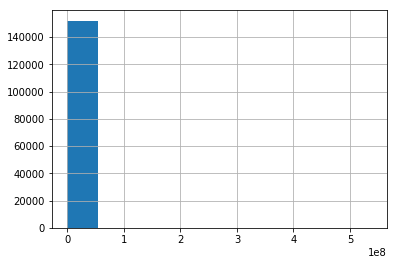

In [37]:
# 2.6
# Identificar y documentar valores atípicos/outliers
# Calcular estadísticos
%matplotlib inline
bp.estimated_cost.hist()

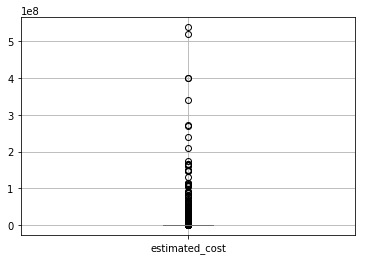

In [38]:
bp.boxplot(column='estimated_cost')


In [39]:
outliers = bp[bp.estimated_cost > (bp.estimated_cost.mean() + 3 * bp.estimated_cost.std())]
outliers

,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,...,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods_analysis_boundaries,zipcode,location,record_id
Permit Number,,,,,,,,,,,,,,,,,,,,,
201301319232,1,3,2013-01-31,3509,043,104,NaN,09th,16,NaN,...,NaN,NaN,1.0,constr type 1,Y,6.0,33,94103.0,"(37.775874401978164, -122.41474608209646)",1294896156329
201303132080,1,3,2013-03-13,3720,009,101,NaN,01st,16,NaN,...,NaN,NaN,1.0,constr type 1,Y,6.0,5,94105.0,"(37.78985529072401, -122.39680054826306)",1298608489715
201303222886,1,3,2013-03-22,0785,029,380,NaN,Fulton,16,NaN,...,NaN,NaN,2.0,constr type 2,Y,5.0,9,94102.0,"(37.779074435016895, -122.42288007095966)",1299648489549
201304023626,1,3,2013-04-02,3738,004,280,NaN,Beale,16,NaN,...,NaN,NaN,1.0,constr type 1,Y,6.0,5,94105.0,"(37.788731891648396, -122.39360475309186)",1300653291153
201304043755,1,3,2013-04-04,5281,003,901,NaN,Rankin,16,NaN,...,NaN,NaN,3.0,constr type 3,Y,10.0,0,94124.0,"(37.74139803774405, -122.39496784660912)",1300716376649
201305015894,1,3,2013-05-01,3719,011,181,NaN,Fremont,16,NaN,...,NaN,NaN,1.0,constr type 1,Y,6.0,5,94105.0,"(37.78980056380927, -122.39532706257731)",1303440358581
201305015894,1,3,2013-05-01,3719,010,183,NaN,Fremont,16,NaN,...,NaN,NaN,1.0,constr type 1,Y,6.0,5,94105.0,"(37.789642439733605, -122.39522078848411)",1303441164656
201305036062,1,3,2013-05-03,0794,028,555,NaN,Fulton,16,NaN,...,NaN,NaN,1.0,constr type 1,Y,5.0,9,94102.0,"(37.77816825589716, -122.42568990589726)",130366381787
201305036062,1,3,2013-05-03,0794,015,746,NaN,Laguna,16,NaN,...,NaN,NaN,1.0,constr type 1,Y,5.0,9,94102.0,"(37.778097526904055, -122.42639453054689)",130368881781


In [40]:
# 2.7
# Evaluar cómo comprimir los datos para su almacenamiento más eficiente
# 2.8
# Guardar el set de datos con un nombre informativo.
bp.to_csv("../input/Building_Permits-cleaned.csv")